In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
x1 = np.random.normal(10, 1, 200) * 10

In [3]:
x1

array([ 80.47247982, 115.11997164,  95.119359  , 104.26456312,
        99.29428596,  86.24744458, 134.45572719, 102.21422557,
       104.73352646,  91.81011834, 102.26957936, 101.25451948,
       100.91392941, 106.22804528, 102.09195552,  92.82791385,
        83.2920817 ,  98.38670638,  97.06082728,  97.18738141,
       120.59684605,  92.7489384 ,  97.79030054, 104.30242763,
       112.82370121, 114.46683797,  94.42154895,  91.37675535,
        86.41921224,  74.20658823, 110.59226931, 109.69037658,
       112.25267612,  91.71425669, 103.85874255, 101.98970673,
       108.47019921,  84.20549614,  89.42903526, 109.71787574,
       106.83360317, 100.00050203, 123.75885677,  89.20714198,
       113.12485554,  77.66000064,  97.13234392, 112.25167604,
       123.44440005, 102.16033324, 106.07535413,  94.51450195,
        92.23412275, 104.09039288,  98.78914683,  76.25977935,
       107.89428492, 101.91965548, 114.5634993 , 104.72411211,
        86.92260435,  91.20273692, 101.33288138,  95.98

/home/kashif/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


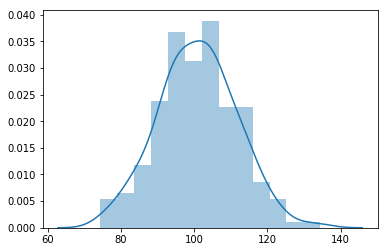

In [4]:
sns.distplot(x1)

### Negative Correlation with x1

In [5]:
y1 = 100 - x1 

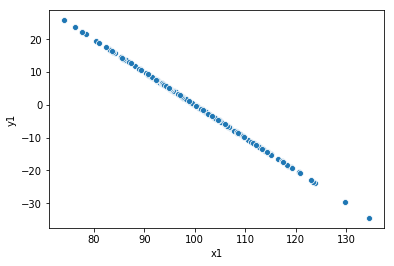

In [6]:
ax = sns.scatterplot(x1, y1,)
ax.set(xlabel='x1', ylabel='y1')
plt.show()

In [7]:
from scipy.stats import pearsonr
pearsonr(x1, y1)

(-1.0, 0.0)

This is almost perfect negative correlation

## Positve Correlation

#### In real world, you would probably see some noise in your data

In [8]:
x2 = np.random.normal(10, 1, 200) * 10
y2 = x2 + np.random.normal(40, 5.2, 200)

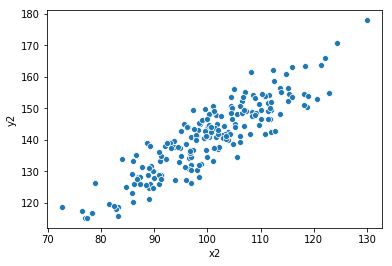

In [9]:
ax = sns.scatterplot(x2, y2,)
ax.set(xlabel='x2', ylabel='y2')
plt.show()

In [10]:
pearsonr(x2, y2)

(0.891000664100236, 7.944323051610202e-70)

In [ ]:
ax = sns.regplot(x2, y2,)
ax.set(xlabel='x2', ylabel='y2')
plt.show()

## Heatmaps

In [11]:
x3 = np.random.random(200)
y3 = x1 + x3 - 20

x4 = np.random.normal(100, 1.5, 200)
y4 = x1 + x4 + x2

data_df = pd.DataFrame({'x1': x1, 'x2': x2,'x3': x3,
                        'x4': x4, 'y1': y1,'y2': y2,
                        'y3': y3, 'y4': y4})

In [12]:
data_df.head()

,x1,x2,x3,x4,y1,y2,y3,y4
0,80.472480,99.995287,0.556319,98.103756,19.527520,134.465732,61.028799,278.571523
1,115.119972,101.107521,0.908905,101.022405,-15.119972,150.559886,96.028877,317.249898
2,95.119359,111.964893,0.874729,102.305988,4.880641,142.333311,75.994088,309.390240
3,104.264563,83.195078,0.921214,99.087271,-4.264563,118.660032,85.185777,286.546912
4,99.294286,105.152642,0.327162,99.995493,0.705714,144.891772,79.621448,304.442421


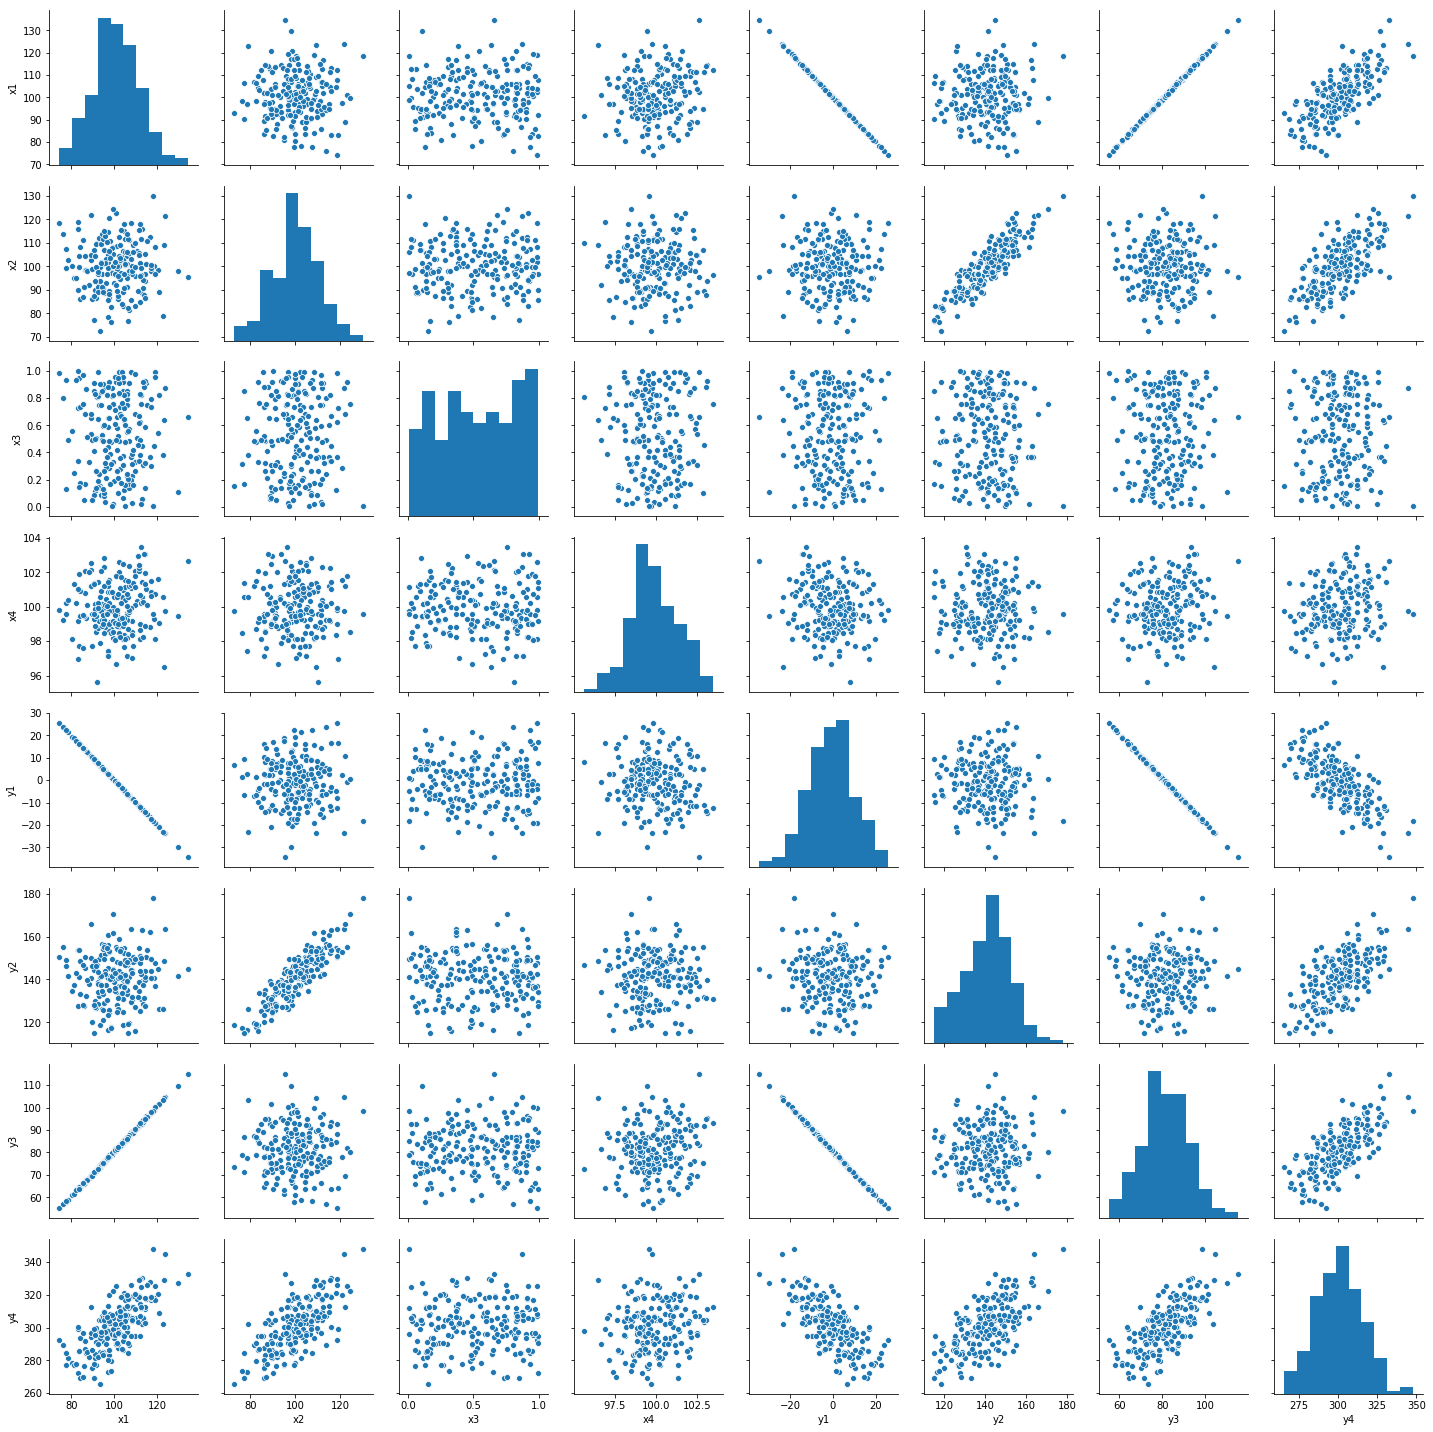

In [13]:
sns.pairplot(data_df)

## Use pandas corr() function to find correlation

In [14]:
data_df.corr()

,x1,x2,x3,x4,y1,y2,y3,y4
x1,1.000000,-0.009841,-0.005000,0.115520,-1.000000,0.040004,0.999620,0.715120
x2,-0.009841,1.000000,0.025853,-0.010934,0.009841,0.891001,-0.009126,0.685324
x3,-0.005000,0.025853,1.000000,-0.040003,0.005000,-0.054222,0.022580,0.010511
x4,0.115520,-0.010934,-0.040003,1.000000,-0.115520,-0.005153,0.114389,0.171056
y1,-1.000000,0.009841,0.005000,-0.115520,1.000000,-0.040004,-0.999620,-0.715120
y2,0.040004,0.891001,-0.054222,-0.005153,-0.040004,1.000000,0.038499,0.645734
y3,0.999620,-0.009126,0.022580,0.114389,-0.999620,0.038499,1.000000,0.715237
y4,0.715120,0.685324,0.010511,0.171056,-0.715120,0.645734,0.715237,1.000000


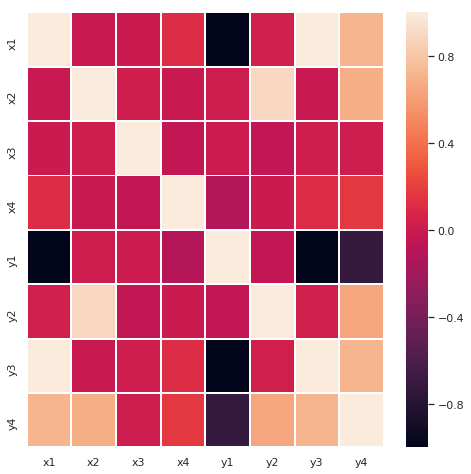

In [15]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(data_df.corr(), annot=False,
                 linewidths=1, fmt='.2f')

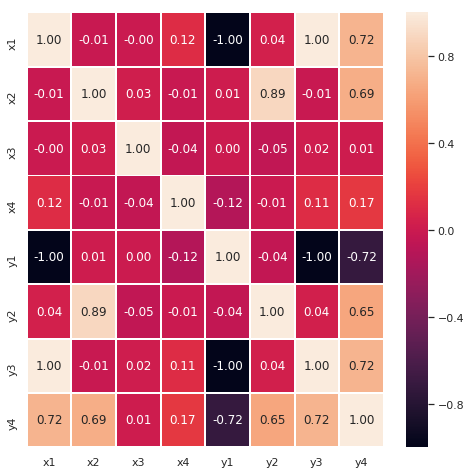

In [16]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(data_df.corr(), annot=True,
                 linewidths=1, fmt='.2f')

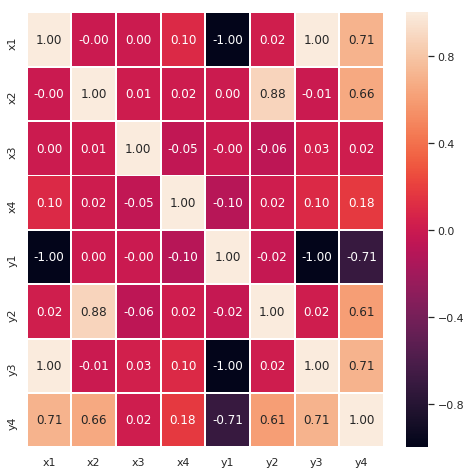

In [17]:
sns.set(rc={'figure.figsize':(8,8)})
ax = sns.heatmap(data_df.corr(method='spearman'), annot=True, linewidths=1, fmt='.2f')

### Interesting Links on Correlation Coefficients :  
- https://stats.stackexchange.com/questions/8071/how-to-choose-between-pearson-and-spearman-correlation  
- https://support.minitab.com/en-us/minitab-express/1/help-and-how-to/modeling-statistics/regression/supporting-topics/basics/a-comparison-of-the-pearson-and-spearman-correlation-methods/  
- https://stats.stackexchange.com/questions/344737/how-to-know-whether-pearsons-or-spearmans-correlation-is-better-to-use

##